# 1. Importing All Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics

from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score

from sklearn.metrics import precision_recall_curve

# 2. Importing Dataset 

In [3]:
leads = pd.read_csv('leads_1.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# 3. Checking the Data Quality 

In [4]:
leads.shape

(9240, 37)

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# 4. Exploratory Data Analysis 
### 4.1 Data Understanding and Preparation

#### 4.1.1 Checking for any Duplicates

In [7]:
sum(leads.duplicated(subset = 'Prospect ID')) == 0
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

 **Inference** : 
 - All values in "Prospect ID and Lead Number" are unique. 
 - These two columns are just indicative ID for the people who approached and can be dropped.

#### 4.1.2 Dropping Lead Number and Prospect ID since they have all unique values

In [8]:
leads.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

#### 4.1.3 Converting "Select" values to NaN 

In [9]:
leads = leads.replace ('Select', np.nan)

#### 4.1.4 Checking null values in each column

In [10]:
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

#### 4.1.5 Checking percentage of null values in each column

In [11]:
round (100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

#### 4.1.6 Dropping columns having more than 45% missing values 

In [12]:
cols = leads.columns
for i in cols:
    if ((100*leads[i].isnull().sum()/len(leads.index))) >= 45:
        leads.drop(i, axis = 1, inplace = True)

#### 4.1.7 Checking null values percentage

In [13]:
round (100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

## 4.2 Categorical Attributes Analysis of Different Columns

### 4.2.1 Studying "Country" Column

#### 4.2.1.1 Checking the value counts

In [14]:
leads['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

#### 4.2.1.2 Plotting the Spread

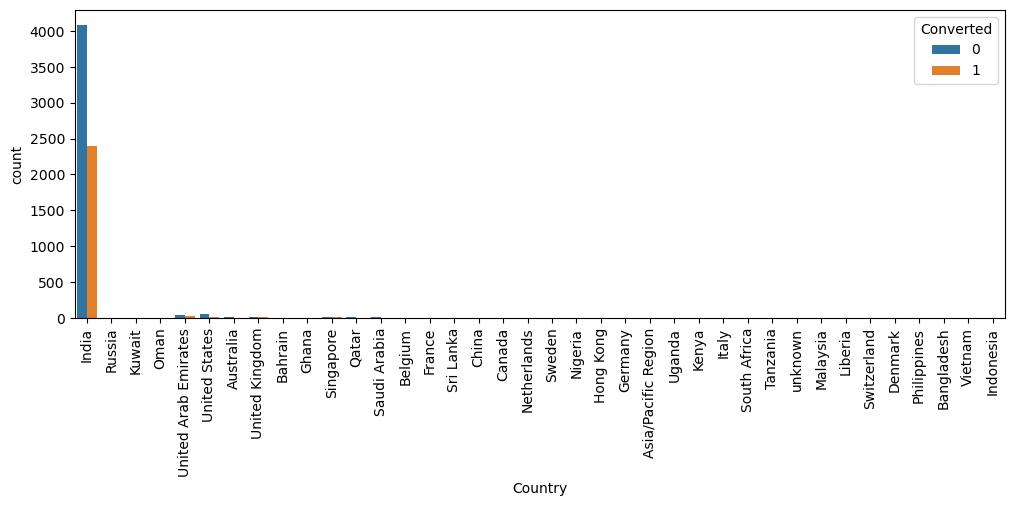

In [15]:
plt.figure(figsize=(12,4))
Country_Spread = sns.countplot(x = 'Country', hue = 'Converted', data = leads)
Country_Spread.set_xticklabels(Country_Spread.get_xticklabels(), rotation = 90)
plt.show()

**Inference**:
- Number of values for India are quite high (about 97% of the data)
- This column can be dropped

#### 4.2.1.3 Creating a list of columns to be dropped

In [16]:
cols_to_drop = ['Country']

### 4.2.2 Studying "City" Column

#### 4.2.2.1 Checking the value counts

In [17]:
leads['City'].value_counts(dropna = False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

#### 4.2.2.2 Replacing NaN with 'Mumbai'

In [18]:
leads['City'] = leads['City'].replace(np.nan,'Mumbai')

#### 4.2.2.3 Plotting the spread

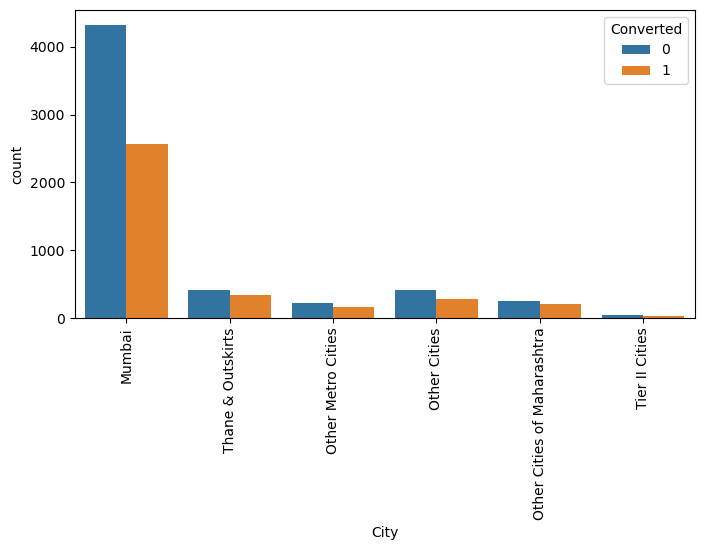

In [19]:
plt.figure(figsize=(8,4))
City_Spread = sns.countplot(x = 'City', hue = 'Converted', data = leads)
City_Spread.set_xticklabels(City_Spread.get_xticklabels(), rotation = 90)
plt.show()

## 4.2.3 Studying "Specialization" Column

#### 4.2.3.1 Checking the value counts

In [20]:
leads['Specialization'].value_counts(dropna = False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

**Inference**:
- There are highest number of leads where Specialization is not mentioned.
- Either they don't have any Specialization or they are students.
- Replacing NaN value with "Not Specified" to make it more relevant.

#### 4.2.3.2 Replacing NaN with 'Not Specified'

In [21]:
leads['Specialization'] = leads['Specialization'].replace(np.nan,'Not Specified')

#### 4.2.3.3 Plotting the Spread

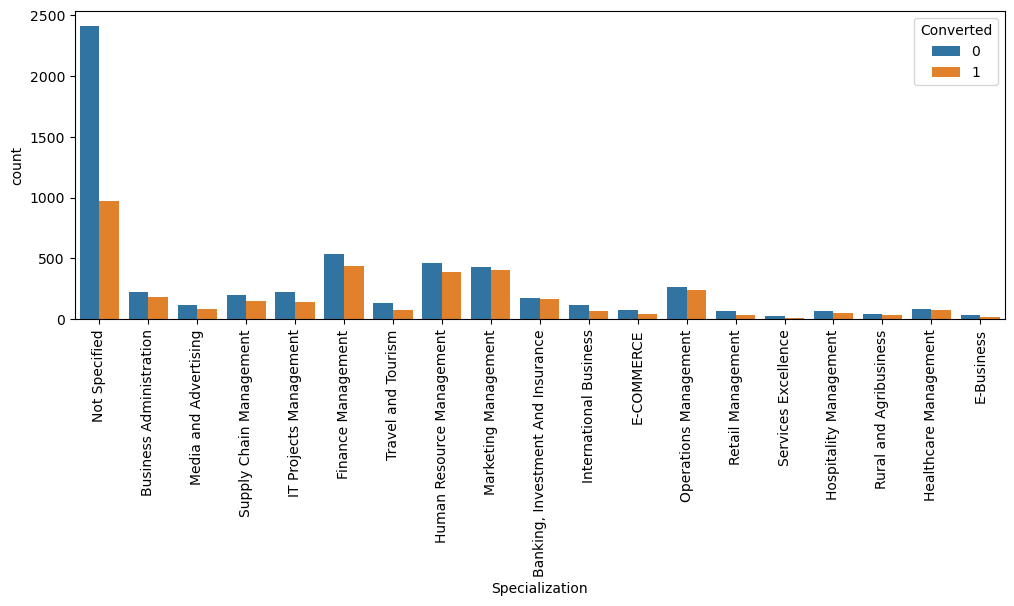

In [22]:
plt.figure(figsize=(12,4))
Specialization_Spread = sns.countplot(x = 'Specialization', hue = 'Converted', data = leads)
Specialization_Spread.set_xticklabels(Specialization_Spread.get_xticklabels(), rotation = 90)
plt.show()

**Inference**:
- People having specialization Management have number of leads as well as leads converted
- This is definately a significant variable and we should not drop it.

#### 4.2.3.4 Putting all Management Specializations under one category "Management_Specialization"

In [23]:
leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management','Management_Specializations'],'Management_Specialization')

#### 4.2.3.5 Visualizing the Spread of updated Specialization Category

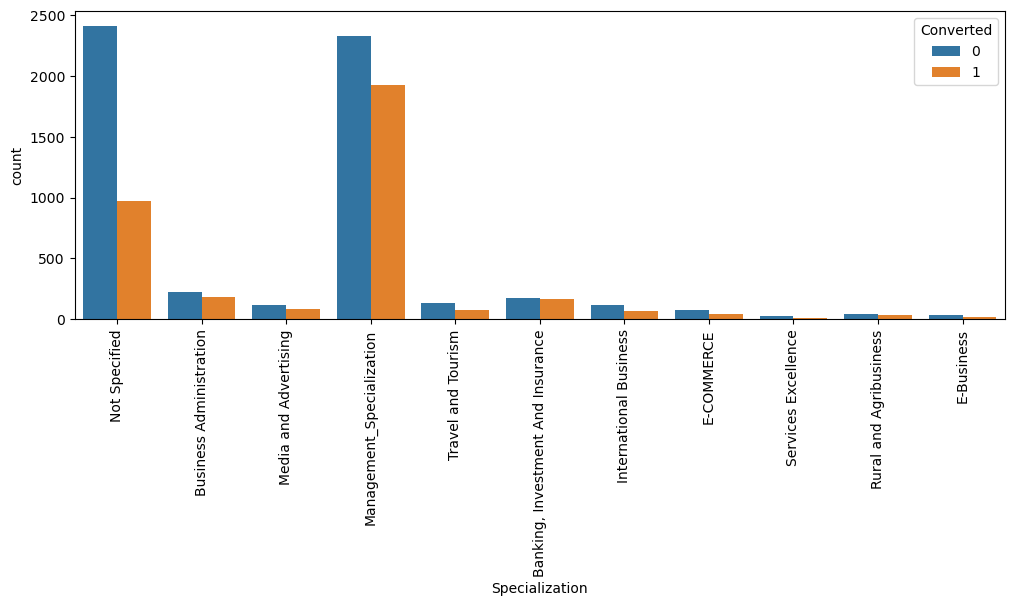

In [24]:
plt.figure(figsize=(12,4))
Specialization_Spread = sns.countplot(x = 'Specialization', hue = 'Converted', data = leads)
Specialization_Spread.set_xticklabels(Specialization_Spread.get_xticklabels(), rotation = 90)
plt.show()

### 4.2.4 Studying "What is your current occupation" Column

#### 4.2.4.1 Checking the value count

In [25]:
leads['What is your current occupation'].value_counts(dropna = False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

#### 4.2.4.2 Imputing NaN with "Unemployed"

In [26]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan,'Unemployed')

#### 4.2.4.3 Checking the value count again post imputation 

In [27]:
leads['What is your current occupation'].value_counts(dropna = False)

What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

#### 4.2.4.4 Visualizing the Spread

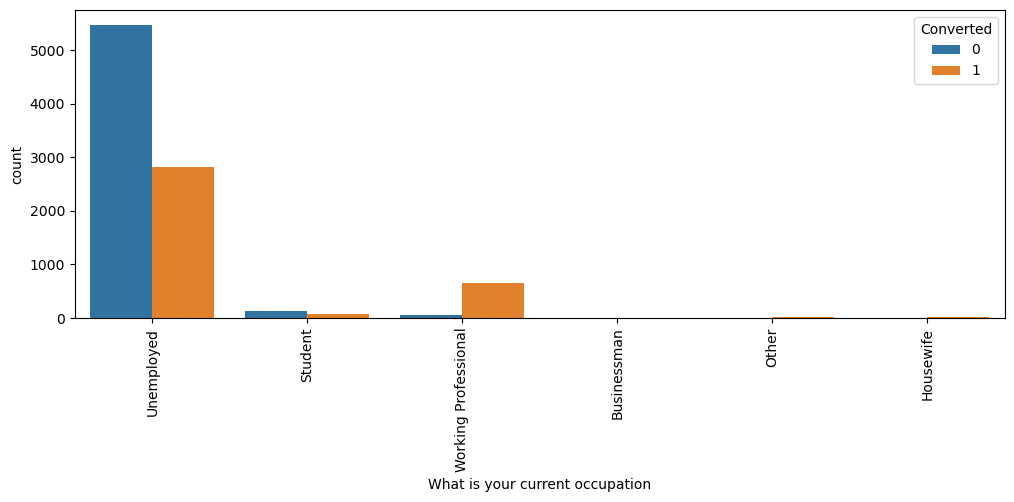

In [28]:
plt.figure(figsize=(12,4))
Employment_Spread = sns.countplot(x = 'What is your current occupation', hue = 'Converted', data = leads)
Employment_Spread.set_xticklabels(Employment_Spread.get_xticklabels(), rotation = 90)
plt.show()

**Inference**:
- Working Professionals going for the course having the high chance of joining the course.
- Unemployed leads are the most in terms of Absolute numbers.

### 4.2.5 Studying "What matters most to you in choosing a course" Column

#### 4.2.5.1 Checking the value count

In [29]:
leads['What matters most to you in choosing a course'].value_counts(dropna = False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

#### 4.2.5.2 Replacing NaN values with "Better Career Prospects"

In [30]:
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

#### 4.2.5.3 Checking the value count again

In [31]:
leads['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

#### 4.2.5.4 Checking the Spread

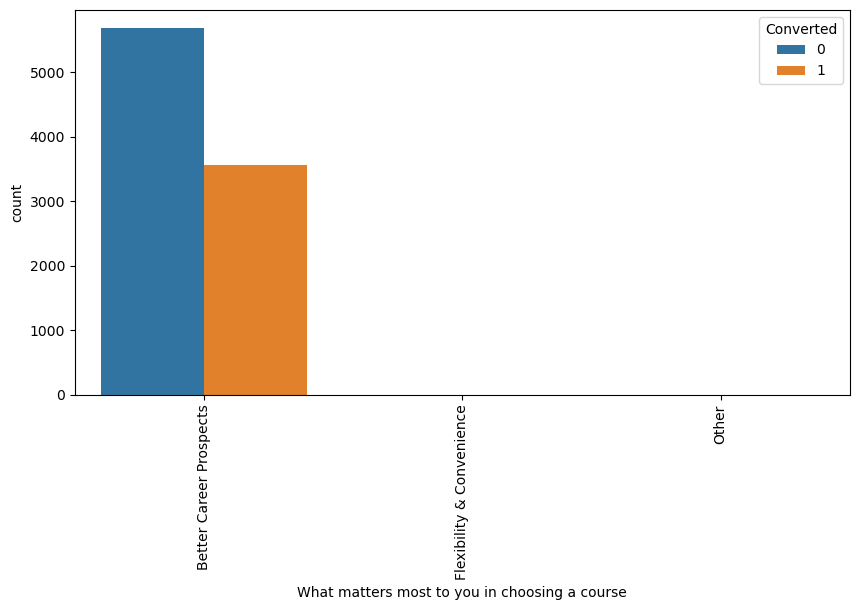

In [32]:
plt.figure(figsize=(10,5))
Reason_for_Joining_a_Course_Spread = sns.countplot(x = 'What matters most to you in choosing a course', hue = 'Converted', data = leads)
Reason_for_Joining_a_Course_Spread.set_xticklabels(Reason_for_Joining_a_Course_Spread.get_xticklabels(), rotation = 90)
plt.show()

#### 4.2.5.5 Again we have another column that is worth droping, Therefore, adding this column as well to cols_to_drop list

In [33]:
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

### 4.2.6 Studying "Tags" Column

#### 4.2.6.1 Checking the value counts

In [34]:
leads['Tags'].value_counts(dropna = False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

#### 4.2.6.2 Replacing NaN with "Not Specified"

In [35]:
leads['Tags'] = leads['Tags'].replace(np.nan,"Not Specified")

#### 4.2.6.3 Visualizing the Spread

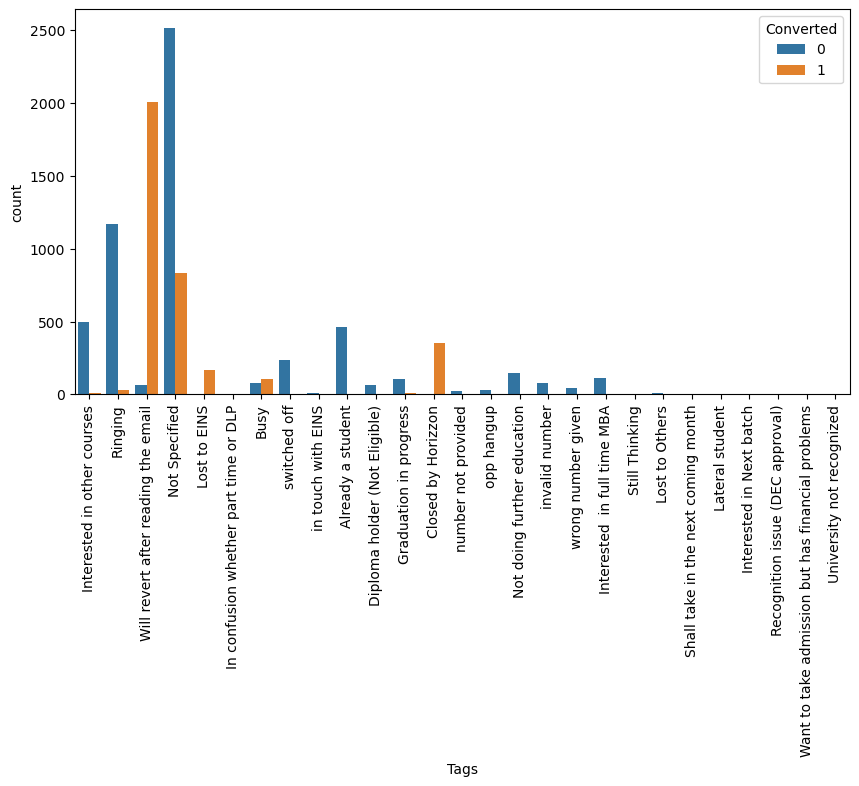

In [36]:
plt.figure(figsize=(10,5))
Tags_Spread = sns.countplot(x = 'Tags', hue = 'Converted', data = leads)
Tags_Spread.set_xticklabels(Tags_Spread.get_xticklabels(), rotation = 90)
plt.show()

#### 4.2.6.4 Replacing low frequency values with "Other Tags"

In [37]:
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

In [38]:
leads['Tags'] = leads['Tags'].replace(['switched off','Already a student','Not doing further education',
                                       'invalid number','wrong number given','Interested  in full time MBA'] , 'Other_Tags')

### 4.2.7 Studying "Lead Source" Column

#### 4.2.7.1 Checking the value counts

In [39]:
leads['Lead Source'].value_counts(dropna = False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

#### 4.2.7.2 Replacing NaN with 'Others'

In [40]:
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')

#### 4.2.7.3 Replacing google with Google

In [41]:
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')

#### 4.2.7.4 Replacing Facebook with Social Media

In [42]:
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')

####  4.2.7.5 Combining low frequency values with 'Others'

In [43]:
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads','testone','NC_EDM'] ,'Others')

#### 4.2.7.6 Final value count 

In [44]:
leads['Lead Source'].value_counts()

Lead Source
Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                55
Live Chat              2
Name: count, dtype: int64

- We can group some of the lower frequency occuring lables under a common label 'Others'

#### 4.2.7.7 Visualizing the Spread

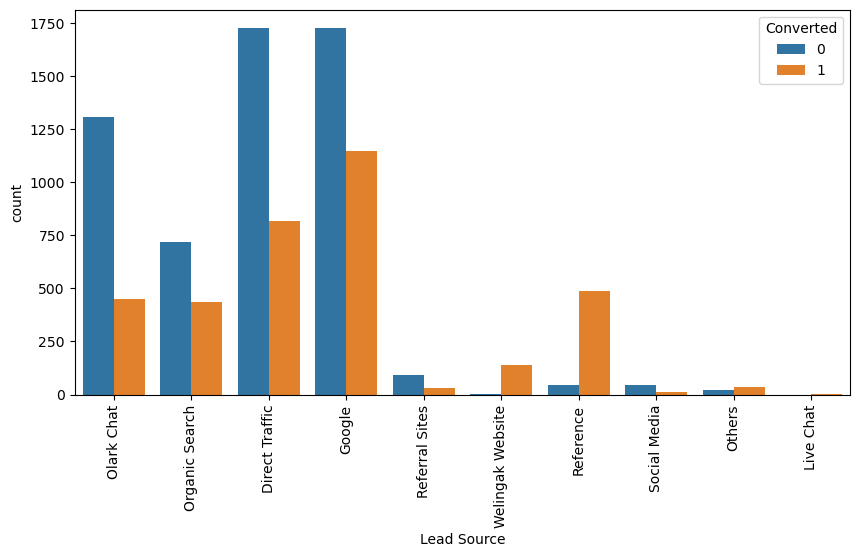

In [45]:
plt.figure(figsize=(10,5))
Lead_Source_Spread = sns.countplot(x = 'Lead Source', hue = 'Converted', data = leads)
Lead_Source_Spread.set_xticklabels(Lead_Source_Spread.get_xticklabels(), rotation = 90)
plt.show()

#### **Inference** :
1. Maximum number of leads are generated by Google and Direct traffic.
2. Conversion Rate of reference leads and leads through welingak website is high.
3. To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

### 4.2.8 Studying "Last Activity" Column

#### 4.2.8.1 Checking the value count

In [46]:
leads['Last Activity'].value_counts(dropna = False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

#### 4.2.8.2 Replacing NaN with "Others"

In [47]:
leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')

#### 4.2.8.3 Replacing Low Frequency values with "Others"

In [48]:
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation', 
                                                        'Approached upfront','View in browser link Clicked',    
                                                        'Email Marked Spam','Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

#### 4.2.8.4 Checking the value count again

In [49]:
leads['Last Activity'].value_counts(dropna = False)

Last Activity
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: count, dtype: int64

#### 4.2.8.5 Checking the Null values in All Columns

In [50]:
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### 4.2.8.6 Dropping all rows with NaN values. Since, the number of dropped rows is less than 2%, it will not affect the model

In [51]:
leads = leads.dropna()

#### 4.2.8.7 Checking percentage of Null values again in all Columns

In [52]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

### 4.2.9 Studying "Lead Origin" Column

#### 4.2.9.1 Checking the value count

In [53]:
leads ['Lead Origin'].value_counts(dropna = False)

Lead Origin
Landing Page Submission    4850
API                        1902
Lead Add Form                27
Name: count, dtype: int64

#### 4.2.9.2 Visualing the Spread

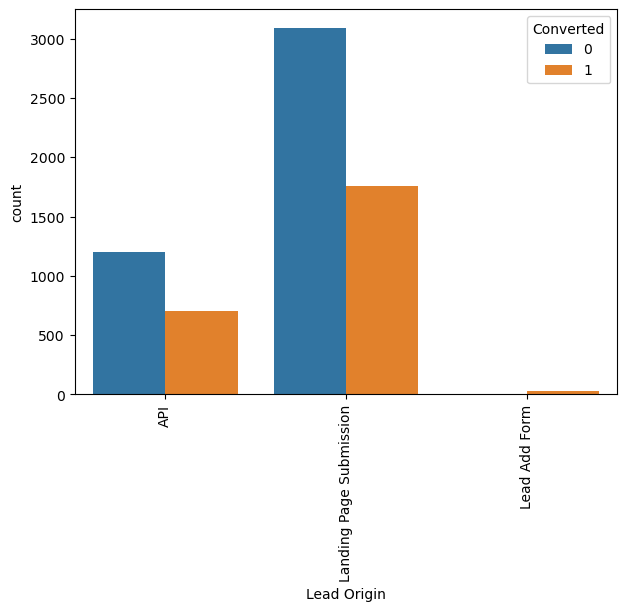

In [54]:
plt.figure(figsize=(7,5))
Lead_Origin_Spread = sns.countplot(x = 'Lead Origin', hue = 'Converted', data = leads)
Lead_Origin_Spread.set_xticklabels(Lead_Origin_Spread.get_xticklabels(), rotation = 90)
plt.show()

#### **Inference**:

1. API and Landing Page Submission bring higher number of leads as well as conversion.
2. Lead Add Form has a very high conversion rate but count of leads are not very high.
3. Lead Import and Quick Add Form get very few leads.
4. In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

### 4.2.10 Studying "Do Not Call" Column

#### 4.2.10.1 Checking the value count

In [55]:
leads['Do Not Call'].value_counts(dropna = False)

Do Not Call
No     6778
Yes       1
Name: count, dtype: int64

#### 4.2.10.2 Checking the Spread

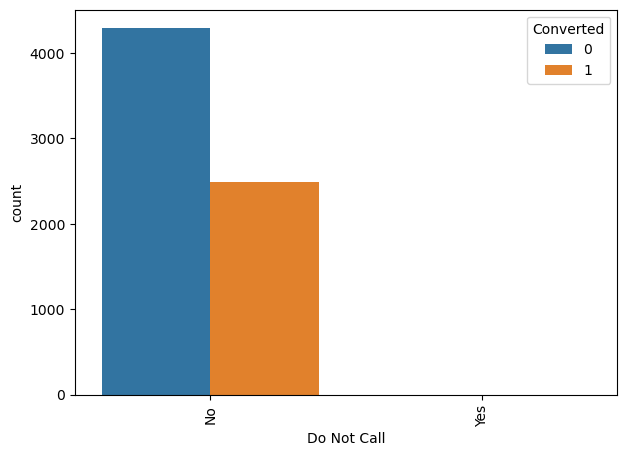

In [56]:
plt.figure(figsize=(7,5))
Do_Not_Call_Spread = sns.countplot(x = 'Do Not Call', hue = 'Converted', data = leads)
Do_Not_Call_Spread.set_xticklabels(Do_Not_Call_Spread.get_xticklabels(), rotation = 90)
plt.show()

- We Can append the Do Not Call Column to the list of Columns to be Dropped since > 90% is of only one Value

#### 4.2.10.3 Dropping the Column "Do Not Call"

In [57]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

### 4.2.11 Studying "Do Not Email" Column

#### 4.2.11.1 Checking the value count 

In [58]:
leads ['Do Not Email'].value_counts(dropna = False)

Do Not Email
No     6186
Yes     593
Name: count, dtype: int64

#### 4.2.11.2 Visualizing the Spread

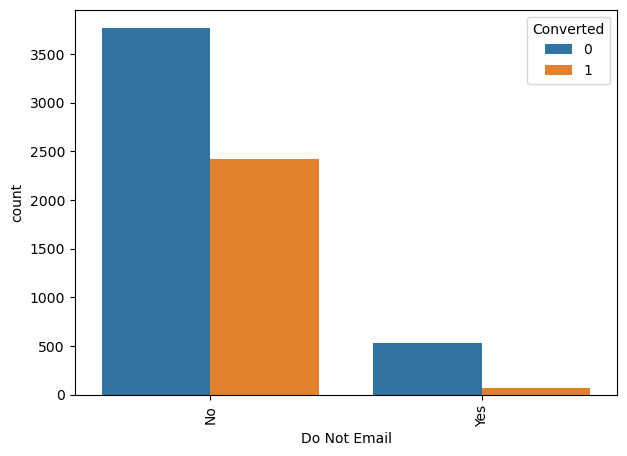

In [59]:
plt.figure(figsize=(7,5))
Do_Not_Email_Spread = sns.countplot(x = 'Do Not Email', hue = 'Converted', data = leads)
Do_Not_Email_Spread.set_xticklabels(Do_Not_Email_Spread.get_xticklabels(), rotation = 90)
plt.show()



### 4.2.12 Studying various IMBALANCED Columns

In [60]:
leads.Search.value_counts(dropna = False)

Search
No     6765
Yes      14
Name: count, dtype: int64

In [61]:
leads.Magazine.value_counts(dropna = False)

Magazine
No    6779
Name: count, dtype: int64

In [62]:
leads['Newspaper Article'].value_counts(dropna = False)

Newspaper Article
No     6777
Yes       2
Name: count, dtype: int64

In [63]:
leads['X Education Forums'].value_counts(dropna = False)

X Education Forums
No     6778
Yes       1
Name: count, dtype: int64

In [64]:
leads['Newspaper'].value_counts(dropna = False)

Newspaper
No     6778
Yes       1
Name: count, dtype: int64

In [65]:
leads ['Digital Advertisement'].value_counts(dropna = False)

Digital Advertisement
No     6775
Yes       4
Name: count, dtype: int64

In [66]:
leads['Through Recommendations'].value_counts(dropna = False)

Through Recommendations
No     6772
Yes       7
Name: count, dtype: int64

In [67]:
leads['Receive More Updates About Our Courses'].value_counts(dropna = False)

Receive More Updates About Our Courses
No    6779
Name: count, dtype: int64

In [68]:
leads['Update me on Supply Chain Content'].value_counts(dropna = False)

Update me on Supply Chain Content
No    6779
Name: count, dtype: int64

In [69]:
leads['Get updates on DM Content'].value_counts(dropna = False)

Get updates on DM Content
No    6779
Name: count, dtype: int64

In [70]:
leads['I agree to pay the amount through cheque'].value_counts(dropna = False)

I agree to pay the amount through cheque
No    6779
Name: count, dtype: int64

In [71]:
leads['A free copy of Mastering The Interview'].value_counts(dropna = False)

A free copy of Mastering The Interview
No     3913
Yes    2866
Name: count, dtype: int64

#### 4.2.12.1 Adding the Imbalanced Columns to the list cols_to_drop

In [72]:
cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'])

### 4.2.13 Studying "Last Notable Activity" Column

#### 4.2.13.1 Checking the value count

In [73]:
leads['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        2331
Email Opened                    2212
SMS Sent                        1643
Page Visited on Website          286
Email Link Clicked               106
Olark Chat Conversation           68
Email Bounced                     48
Unsubscribed                      40
Unreachable                       26
Had a Phone Conversation          14
Approached upfront                 1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Email Marked Spam                  1
Name: count, dtype: int64

#### 4.2.13.2 Combining Low frequency values with "Other_Notable_Activity"

In [74]:
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Unreachable','Unsubscribed',
                                                                         'Email Bounced','Resubscribed to emails','View in browser link Clicked',
                                                                       'Approached upfront','Form Submitted on Website','Email Received'],'Other_Notable_activity')

#### 4.2.13.3 Visualizing the Spread 

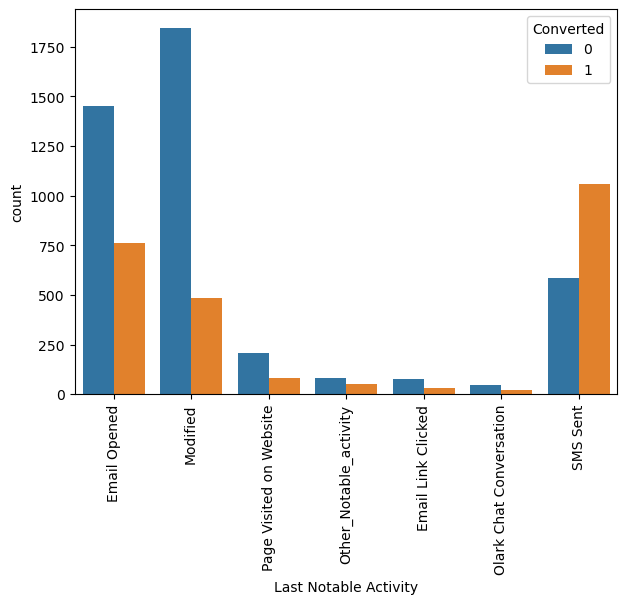

In [75]:
plt.figure(figsize=(7,5))
Last_Notable_Activity_Spread = sns.countplot(x = 'Last Notable Activity', hue = 'Converted', data = leads)
Last_Notable_Activity_Spread.set_xticklabels(Last_Notable_Activity_Spread.get_xticklabels(), rotation = 90)
plt.show()

#### 4.2.13.4 Checking the value count again

In [76]:
leads['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                   2331
Email Opened               2212
SMS Sent                   1643
Page Visited on Website     286
Other_Notable_activity      133
Email Link Clicked          106
Olark Chat Conversation      68
Name: count, dtype: int64

#### 4.2.13.5 List of columns to be dropped

In [77]:
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

#### 4.2.13.6 Dropping the columns

In [78]:
leads = leads.drop(cols_to_drop, axis = 1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6779 entries, 1 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6779 non-null   object 
 1   Lead Source                             6779 non-null   object 
 2   Do Not Email                            6779 non-null   object 
 3   Converted                               6779 non-null   int64  
 4   TotalVisits                             6779 non-null   float64
 5   Total Time Spent on Website             6779 non-null   int64  
 6   Page Views Per Visit                    6779 non-null   float64
 7   Last Activity                           6779 non-null   object 
 8   Specialization                          6779 non-null   object 
 9   What is your current occupation         6779 non-null   object 
 10  Tags                                    6779 non-null   object 
 

## 4.3 Numerical Attributes Analysis of different Columns

### 4.3.1 Check the % of Data that has Converted Values = 1

In [79]:
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

36.65732408909869

In [80]:
numeric_data = leads.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()

### 4.3.2 Checking Correlations of Numeric values

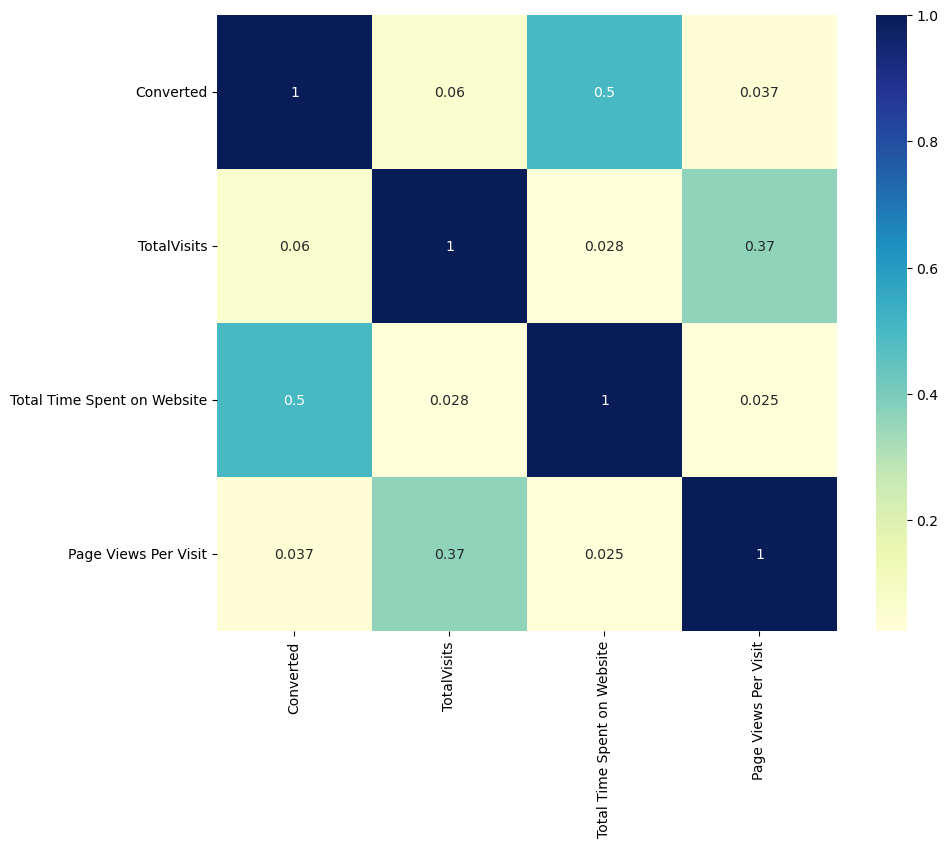

In [81]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.show()

### 4.3.3 Studying "Total Visits" Column

#### 4.3.3.1 Visualizing the boxplot

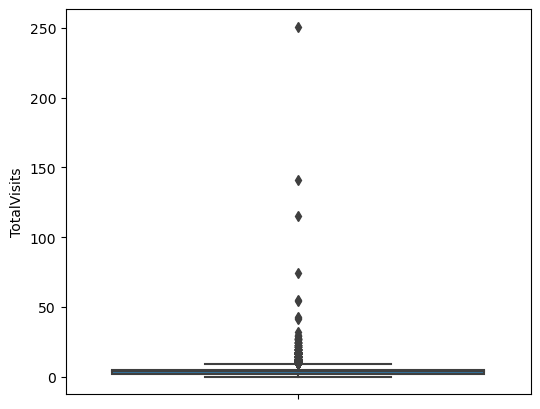

In [82]:
plt.figure(figsize = (6,5))
sns.boxplot(y = leads['TotalVisits'])
plt.show()

- We can see the presence of  outliers here.

#### 4.3.3.2 Checking the percentile values for "Total Visits"

In [83]:
leads['TotalVisits'].describe(percentiles = [0.05,.25, .5, .75, .90, .95, .99])

count    6779.000000
mean        4.553917
std         5.138148
min         0.000000
5%          1.000000
25%         2.000000
50%         4.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        18.220000
max       251.000000
Name: TotalVisits, dtype: float64

#### 4.3.3.3 Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

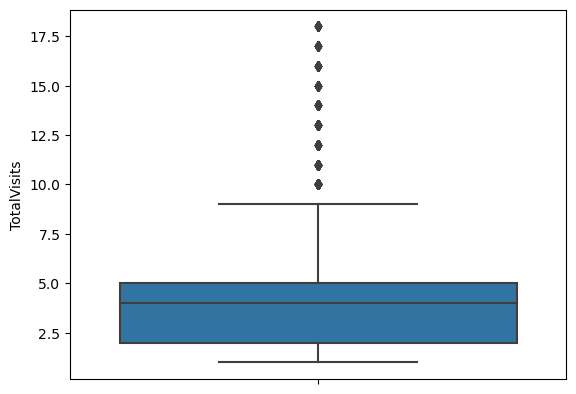

In [84]:
Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

#### 4.3.3.4 Checking the Spread of "Total Visits" vs Converted variable

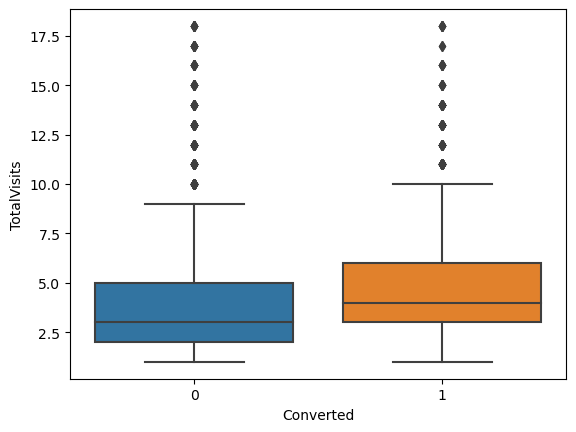

In [85]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

**Inference**

- Median for converted and not converted leads are the close.
- Nothng conclusive can be said on the basis of Total Visits

In [86]:
leads.shape

(6706, 14)

### 4.3.4 Studying "Total Time Spent on Website" Column

#### 4.3.4.1 Checking the percentiles

In [87]:
leads['Total Time Spent on Website'].describe(percentiles = [0.05,.25, .5, .75, .90, .95, .99])

count    6706.000000
mean      631.736206
std       541.763382
min         0.000000
5%         33.000000
25%       171.000000
50%       397.000000
75%      1104.000000
90%      1451.500000
95%      1606.000000
99%      1862.950000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

#### 4.3.4.2 Visualizing the boxplot

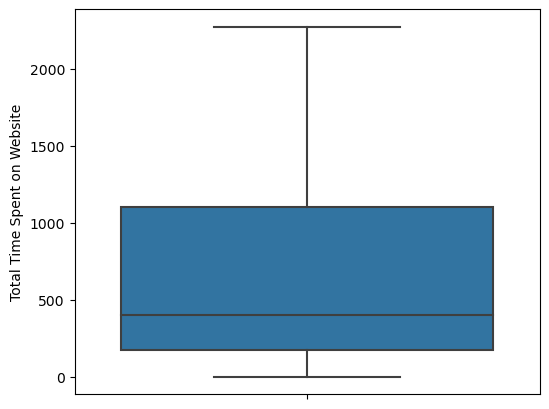

In [88]:
plt.figure(figsize = (6,5))
sns.boxplot(y = leads['Total Time Spent on Website'])
plt.show()

- Since there are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column

#### 4.3.4.3 Checking Spread of "Total Time Spent on Website" vs Converted variable

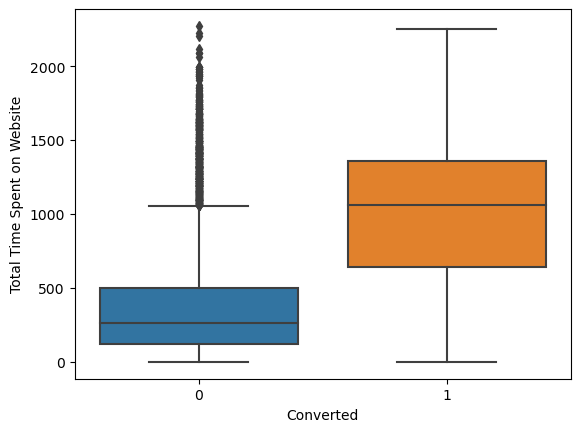

In [89]:
sns.boxplot(x = leads.Converted, y = leads['Total Time Spent on Website'])
plt.show()

**Inference**

- Leads spending more time on the website are more likely to be converted.
- Website should be made more engaging to make leads spend more time.

### 4.3.5 Studying "Page Views Per Visit"

#### 4.3.5.1 Checking spread of "Page Views Per Visit"

In [90]:
leads['Page Views Per Visit'].describe()

count    6706.000000
mean        3.104545
std         1.817244
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

#### 4.3.5.2 Visualizing the Spread

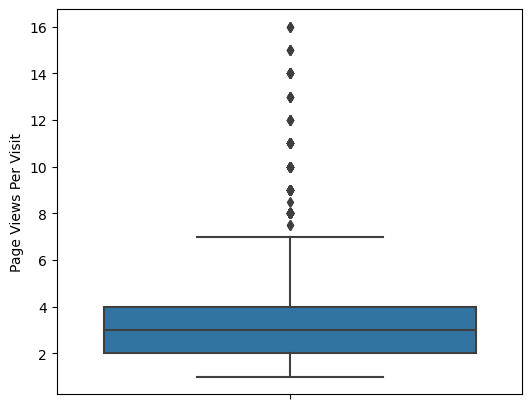

In [91]:
plt.figure(figsize = (6,5))
sns.boxplot(y = leads['Page Views Per Visit'])
plt.show()

#### 4.3.5.3 Outlier Treatment: Remove top & bottom 1% 

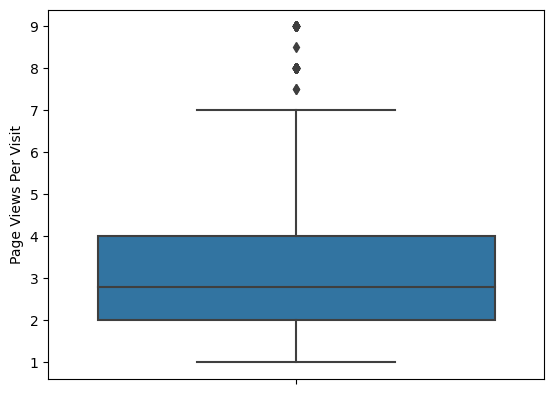

In [92]:
Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

#### 4.3.5.4 Checking Spread of "Page Views Per Visit" vs Converted variable

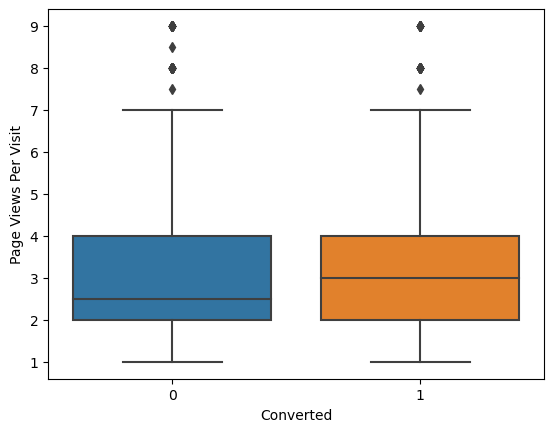

In [93]:
sns.boxplot(x = leads.Converted,y = leads['Page Views Per Visit'])
plt.show()

**Inference**

- Median for converted and unconverted leads is the same.
- Nothing can be said specifically for lead conversion from Page Views Per Visit

#### 4.3.5.5 Checking missing values in leftover columns

In [94]:
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

- There are no missing values in the columns to be analyzed further

## 4.4 Dummy Variable Creation

#### 4.4.1 Getting a list of categorical columns

In [95]:
cat_cols = leads.select_dtypes(include = ['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### 4.4.2 List of variables to map

In [96]:
varlist =  ['A free copy of Mastering The Interview','Do Not Email']

#### 4.4.3 Defining the map function

In [97]:
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

#### 4.4.4 Applying the function to the list

In [98]:
leads[varlist] = leads[varlist].apply(binary_map)

#### 4.4.5 Getting dummies and dropping the first column and adding the results to the master dataframe

In [99]:
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation','City']], drop_first = True)
leads = pd.concat([leads,dummy], axis = 1)

In [100]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], axis = 1)
leads = pd.concat([leads, dummy], axis = 1)

In [101]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], axis = 1)
leads = pd.concat([leads, dummy], axis = 1)

In [102]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], axis = 1)
leads = pd.concat([leads, dummy], axis = 1)

In [103]:
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], axis = 1)
leads = pd.concat([leads, dummy], axis = 1)

In [104]:
dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], axis = 1)
leads = pd.concat([leads, dummy], axis = 1)

#### 4.4.6 Dropping the original columns after dummy variable creation

In [105]:
leads.drop(cat_cols, axis = 1, inplace = True)

In [106]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
1,0,5.0,674,2.5,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,1,2.0,1532,2.0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0,1.0,305,1.0,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,1,2.0,1428,1.0,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
6,1,2.0,1640,2.0,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


# 5. Train-Test Split & Logistic Regression Model Building

### 5.1 Putting response variable to y

In [107]:
y = leads['Converted']

y.head()

X = leads.drop('Converted', axis = 1)

### 5.2 Splitting the data into train and test

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state=100)

In [109]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4648 entries, 1979 to 7849
Data columns (total 54 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           4648 non-null   float64
 1   Total Time Spent on Website                           4648 non-null   int64  
 2   Page Views Per Visit                                  4648 non-null   float64
 3   Lead Origin_Landing Page Submission                   4648 non-null   bool   
 4   Lead Origin_Lead Add Form                             4648 non-null   bool   
 5   What is your current occupation_Housewife             4648 non-null   bool   
 6   What is your current occupation_Other                 4648 non-null   bool   
 7   What is your current occupation_Student               4648 non-null   bool   
 8   What is your current occupation_Unemployed            4648 n

###  5.3 Scaling of Data

#### 5.3.1 Scaling Numeric Columns

In [110]:
scaler = StandardScaler()

num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
1979,0.668033,1.836717,1.846001,True,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
6249,1.418399,1.230405,-0.225650,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5557,1.793583,1.857051,3.712353,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
7865,1.793583,-0.645835,3.712353,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
8491,-0.082334,0.086176,0.601766,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


### 5.4 Model Building using Stats Model & RFE

In [111]:
logreg = LogisticRegression()
rfe = RFE(estimator = logreg, n_features_to_select = 15)
rfe.fit(X_train, y_train)
feature_ranks = list(zip(X_train.columns, rfe.support_, rfe.ranking_))

#### 5.4.1 List of RFE supported columns

In [112]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [113]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specialization',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Orga

### 5.5 _____Model 1 

In [114]:
X_train_1 = sm.add_constant(X_train[col])
X_train_1 = X_train_1.astype(int)
Model_1 = sm.GLM(y_train, X_train_1,family = sm.families.Binomial())
Result_1 = Model_1.fit()
Result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4632
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -964.76
Date:                Sun, 25 Feb 2024   Deviance:                       1929.5
Time:                        18:27:42   Pearson chi2:                 5.44e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5914
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6108      0.101    -15.924      0.000      -1.809      -1.413
Total Time Spent on Website                              1.2008      0.097     12.442      0.000       1.012       1.390
Lead Origin_Lead Add Form                               24.5388   4.07e+04      0.001      1.000   -7.98e+04    7.98e+04
What is your current occupation_Working Professional     1.1450      0.490      2.335      0.020       0.184       2.106
Last Activity_Email Bounced                             -1.3310      0.531     -2.507      0.012      -2.372      -0.290
Last Activity_SMS Sent                                   0.8690      0.249      3.496      0.000       0.382       1.356
Last Notable Activity_Modified                          -0.8672      0.175     -4.950      0.000      -1.211      -0.524
Last Notable Activity_Olark Chat Conversation           -0.4714      0.532     -0.885      0.376      -1.515       0.572
Last Notable Activity_SMS Sent                           1.1921      0.287      4.159      0.000       0.630       1.754
Tags_Busy                                                0.7937      0.237      3.344      0.001       0.328       1.259
Tags_Closed by Horizzon                                 27.1308   1.86e+04      0.001      0.999   -3.64e+04    3.64e+04
Tags_Interested in other courses                        -1.9861      0.421     -4.720      0.000      -2.811      -1.161
Tags_Lost to EINS                                        5.1825      0.609      8.508      0.000       3.989       6.376
Tags_Other_Tags                                         -2.5343      0.235    -10.768      0.000      -2.996      -2.073
Tags_Ringing                                            -3.4277      0.278    -12.320      0.000      -3.973      -2.882
Tags_Will revert after reading the email                 4.6475      0.226     20.563      0.000       4.204       5.090
========================================================================================================================
"""

 - p-value of variable Lead Origin_Lead Add Form is high, so we can drop it.

#### 5.5.1 Dropping column with high p-value

In [115]:
col = col.drop('Lead Origin_Lead Add Form', 1)

### 5.6 _____Model 2

In [116]:
X_train_2 = sm.add_constant(X_train[col])
X_train_2 = X_train_2.astype(int)
Model_2 = sm.GLM(y_train, X_train_2,family = sm.families.Binomial())
Result_2 = Model_2.fit()
Result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4633
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -968.39
Date:                Sun, 25 Feb 2024   Deviance:                       1936.8
Time:                        18:27:44   Pearson chi2:                 5.43e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5908
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5937      0.101    -15.849      0.000      -1.791      -1.397
Total Time Spent on Website                              1.1977      0.096     12.425      0.000       1.009       1.387
What is your current occupation_Working Professional     1.1441      0.490      2.337      0.019       0.184       2.104
Last Activity_Email Bounced                             -1.3355      0.530     -2.518      0.012      -2.375      -0.296
Last Activity_SMS Sent                                   0.8678      0.248      3.494      0.000       0.381       1.355
Last Notable Activity_Modified                          -0.8808      0.175     -5.037      0.000      -1.224      -0.538
Last Notable Activity_Olark Chat Conversation           -0.4860      0.532     -0.913      0.361      -1.529       0.557
Last Notable Activity_SMS Sent                           1.1791      0.286      4.118      0.000       0.618       1.740
Tags_Busy                                                0.7863      0.237      3.316      0.001       0.322       1.251
Tags_Closed by Horizzon                                 26.2985   1.16e+04      0.002      0.998   -2.27e+04    2.27e+04
Tags_Interested in other courses                        -1.9922      0.421     -4.737      0.000      -2.817      -1.168
Tags_Lost to EINS                                        5.1754      0.609      8.497      0.000       3.982       6.369
Tags_Other_Tags                                         -2.5399      0.235    -10.801      0.000      -3.001      -2.079
Tags_Ringing                                            -3.4317      0.278    -12.342      0.000      -3.977      -2.887
Tags_Will revert after reading the email                 4.6397      0.226     20.538      0.000       4.197       5.083
========================================================================================================================
"""

- p-value of variable Tags_Closed by Horizzon is high, so we can drop it.

#### 5.6.1 Dropping column with high p-value

In [117]:
col = col.drop('Tags_Closed by Horizzon',1)

### 5.7 _____Model 3

In [118]:
X_train_3 = sm.add_constant(X_train[col])
X_train_3 = X_train_3.astype(int)
Model_3 = sm.GLM(y_train, X_train_3,family = sm.families.Binomial())
Result_3 = Model_3.fit()
Result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4634
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1119.3
Date:                Sun, 25 Feb 2024   Deviance:                       2238.7
Time:                        18:27:46   Pearson chi2:                 5.74e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5633
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3065      0.091    -14.359      0.000      -1.485      -1.128
Total Time Spent on Website                              1.1971      0.089     13.412      0.000       1.022       1.372
What is your current occupation_Working Professional     2.5523      0.364      7.007      0.000       1.838       3.266
Last Activity_Email Bounced                             -1.6945      0.470     -3.603      0.000      -2.616      -0.773
Last Activity_SMS Sent                                   0.2368      0.224      1.059      0.290      -0.201       0.675
Last Notable Activity_Modified                          -0.4131      0.143     -2.896      0.004      -0.693      -0.134
Last Notable Activity_Olark Chat Conversation           -0.5390      0.491     -1.099      0.272      -1.500       0.422
Last Notable Activity_SMS Sent                           1.6206      0.264      6.129      0.000       1.102       2.139
Tags_Busy                                                0.5572      0.231      2.412      0.016       0.104       1.010
Tags_Interested in other courses                        -2.6199      0.419     -6.252      0.000      -3.441      -1.799
Tags_Lost to EINS                                        4.5975      0.602      7.632      0.000       3.417       5.778
Tags_Other_Tags                                         -2.8343      0.232    -12.238      0.000      -3.288      -2.380
Tags_Ringing                                            -3.6216      0.277    -13.067      0.000      -4.165      -3.078
Tags_Will revert after reading the email                 4.1827      0.216     19.332      0.000       3.759       4.607
========================================================================================================================
"""

- p-value of variable Last Activity_SMS Sent is high, so we can drop it.

#### 5.7.1 Dropping column with high p-value


In [119]:
col = col.drop('Last Activity_SMS Sent',1)

### 5.8 _____Model 4 

In [120]:
X_train_4 = sm.add_constant(X_train[col])
X_train_4 = X_train_4.astype(int)
Model_4 = sm.GLM(y_train, X_train_4,family = sm.families.Binomial())
Result_4 = Model_4.fit()
Result_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4635
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1119.9
Date:                Sun, 25 Feb 2024   Deviance:                       2239.8
Time:                        18:27:48   Pearson chi2:                 5.75e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5632
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3060      0.091    -14.356      0.000      -1.484      -1.128
Total Time Spent on Website                              1.1956      0.089     13.397      0.000       1.021       1.371
What is your current occupation_Working Professional     2.5460      0.365      6.982      0.000       1.831       3.261
Last Activity_Email Bounced                             -1.7369      0.468     -3.711      0.000      -2.654      -0.820
Last Notable Activity_Modified                          -0.3517      0.129     -2.719      0.007      -0.605      -0.098
Last Notable Activity_Olark Chat Conversation           -0.5378      0.490     -1.096      0.273      -1.499       0.424
Last Notable Activity_SMS Sent                           1.8553      0.145     12.825      0.000       1.572       2.139
Tags_Busy                                                0.5758      0.231      2.493      0.013       0.123       1.029
Tags_Interested in other courses                        -2.6472      0.418     -6.331      0.000      -3.467      -1.828
Tags_Lost to EINS                                        4.5811      0.602      7.613      0.000       3.402       5.760
Tags_Other_Tags                                         -2.8349      0.231    -12.262      0.000      -3.288      -2.382
Tags_Ringing                                            -3.6186      0.277    -13.059      0.000      -4.162      -3.075
Tags_Will revert after reading the email                 4.1810      0.216     19.338      0.000       3.757       4.605
========================================================================================================================
"""

-  p-value of variable Last Notable Activity_Olark Chat Conversation is high so we can drop it.

#### 5.8.1 Dropping column with high p-value

In [121]:
col = col.drop('Last Notable Activity_Olark Chat Conversation',1)

### 5.9 _____Model 5

In [122]:
X_train_5 = sm.add_constant(X_train[col])
X_train_5 = X_train_5.astype(int)
Model_5 = sm.GLM(y_train, X_train_5,family = sm.families.Binomial())
Result_5 = Model_5.fit()
Result_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4636
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1120.5
Date:                Sun, 25 Feb 2024   Deviance:                       2241.1
Time:                        18:27:50   Pearson chi2:                 5.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5631
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3241      0.090    -14.746      0.000      -1.500      -1.148
Total Time Spent on Website                              1.1914      0.089     13.368      0.000       1.017       1.366
What is your current occupation_Working Professional     2.5564      0.365      7.013      0.000       1.842       3.271
Last Activity_Email Bounced                             -1.7321      0.468     -3.701      0.000      -2.649      -0.815
Last Notable Activity_Modified                          -0.3338      0.129     -2.598      0.009      -0.586      -0.082
Last Notable Activity_SMS Sent                           1.8719      0.144     12.998      0.000       1.590       2.154
Tags_Busy                                                0.5836      0.231      2.527      0.012       0.131       1.036
Tags_Interested in other courses                        -2.6547      0.418     -6.349      0.000      -3.474      -1.835
Tags_Lost to EINS                                        4.5839      0.602      7.617      0.000       3.404       5.763
Tags_Other_Tags                                         -2.8302      0.231    -12.246      0.000      -3.283      -2.377
Tags_Ringing                                            -3.6126      0.277    -13.039      0.000      -4.156      -3.070
Tags_Will revert after reading the email                 4.1848      0.216     19.366      0.000       3.761       4.608
========================================================================================================================
"""

- p-value of variable Tags_Busy is high so we can drop it.

#### 5.9.1 Dropping column with high p-value

In [123]:
col = col.drop('Tags_Busy',1)

### 5.10 _____Model 6

In [124]:
X_train_6 = sm.add_constant(X_train[col])
X_train_6 = X_train_6.astype(int)
Model_6 = sm.GLM(y_train, X_train_6,family = sm.families.Binomial())
Result_6 = Model_6.fit()
Result_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4637
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1123.7
Date:                Sun, 25 Feb 2024   Deviance:                       2247.4
Time:                        18:27:51   Pearson chi2:                 5.84e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5625
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2893      0.088    -14.583      0.000      -1.463      -1.116
Total Time Spent on Website                              1.1950      0.089     13.438      0.000       1.021       1.369
What is your current occupation_Working Professional     2.5420      0.366      6.938      0.000       1.824       3.260
Last Activity_Email Bounced                             -1.7550      0.466     -3.762      0.000      -2.669      -0.841
Last Notable Activity_Modified                          -0.3363      0.128     -2.621      0.009      -0.588      -0.085
Last Notable Activity_SMS Sent                           1.9214      0.143     13.449      0.000       1.641       2.201
Tags_Interested in other courses                        -2.6932      0.418     -6.438      0.000      -3.513      -1.873
Tags_Lost to EINS                                        4.5511      0.602      7.565      0.000       3.372       5.730
Tags_Other_Tags                                         -2.8894      0.231    -12.534      0.000      -3.341      -2.438
Tags_Ringing                                            -3.6842      0.276    -13.333      0.000      -4.226      -3.143
Tags_Will revert after reading the email                 4.1469      0.216     19.231      0.000       3.724       4.570
========================================================================================================================
"""

#### 5.10.1 Dropping column with high p-value


In [125]:
col = col.drop('Last Notable Activity_Modified',1)

### 5.11 _____Model 7

In [126]:
X_train_7 = sm.add_constant(X_train[col])
X_train_7 = X_train_7.astype(int)
Model_7 = sm.GLM(y_train, X_train_7,family = sm.families.Binomial())
Result_7 = Model_7.fit()
Result_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4638
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1127.2
Date:                Sun, 25 Feb 2024   Deviance:                       2254.4
Time:                        18:27:53   Pearson chi2:                 6.08e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5618
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4343      0.071    -20.190      0.000      -1.574      -1.295
Total Time Spent on Website                              1.1928      0.089     13.455      0.000       1.019       1.367
What is your current occupation_Working Professional     2.5727      0.367      7.009      0.000       1.853       3.292
Last Activity_Email Bounced                             -1.8633      0.463     -4.020      0.000      -2.772      -0.955
Last Notable Activity_SMS Sent                           2.0650      0.133     15.509      0.000       1.804       2.326
Tags_Interested in other courses                        -2.7793      0.417     -6.665      0.000      -3.597      -1.962
Tags_Lost to EINS                                        4.4812      0.601      7.450      0.000       3.302       5.660
Tags_Other_Tags                                         -2.8937      0.231    -12.549      0.000      -3.346      -2.442
Tags_Ringing                                            -3.6691      0.277    -13.260      0.000      -4.211      -3.127
Tags_Will revert after reading the email                 4.1820      0.215     19.416      0.000       3.760       4.604
========================================================================================================================
"""

- Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

#### 5.11.1 Check for the VIF values of the feature variables.

In [127]:
# CreatING a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
X_train[col] = X_train[col].astype(int)
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,1.57
3,Last Notable Activity_SMS Sent,1.38
1,What is your current occupation_Working Profes...,1.26
0,Total Time Spent on Website,1.10
7,Tags_Ringing,1.08
6,Tags_Other_Tags,1.06
2,Last Activity_Email Bounced,1.04
5,Tags_Lost to EINS,1.01
4,Tags_Interested in other courses,1.00


 - So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

# 6. Train Set - Getting the Predicted values

In [128]:
y_train_pred = Result_7.predict(X_train_7)
y_train_pred[:10]

1979    0.860992
6249    0.439926
5557    0.041679
7865    0.006040
8491    0.006040
2573    0.192432
474     0.192432
4477    0.973914
1952    0.067414
1816    0.006040
dtype: float64

In [129]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.86099175, 0.43992604, 0.04167915, 0.0060396 , 0.0060396 ,
       0.19243153, 0.19243153, 0.97391418, 0.06741375, 0.0060396 ])

In [130]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.860992,1979
1,0,0.439926,6249
2,0,0.041679,5557
3,0,0.006040,7865
4,0,0.006040,8491


In [131]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.860992,1979,1
1,0,0.439926,6249,0
2,0,0.041679,5557,0
3,0,0.006040,7865,0
4,0,0.006040,8491,0


### 6.1 Confusion matrix 

In [132]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2845  116]
 [ 323 1364]]


### 6.2 Checking the overall accuracy

In [133]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9055507745266781


In [134]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

### 6.3 Checking the Sensitivity

In [135]:
TP / float(TP+FN)

0.8085358624777712

### 6.4 Checking the Specificity

In [136]:
TN / float(TN+FP)

0.9608240459304289

### 6.5 Calculating False Postive Rate - predicting conversion when customer does not have convert

In [137]:
print(FP/ float(TN+FP))

0.03917595406957109


### 6.6 Positive Predictive value 

In [138]:
print (TP / float(TP+FP))

0.9216216216216216


### 6.7 Negative Predictive value

In [139]:
print (TN / float(TN+ FN))

0.8980429292929293


### 6.8 Plotting ROC Curve

In [140]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [141]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

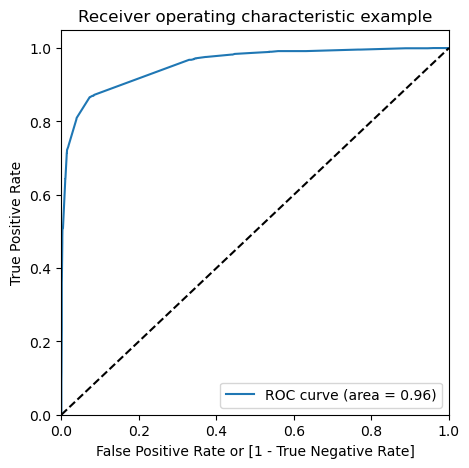

In [142]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

#### Finding Optimal Cutoff Point

- Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

### 6.9 Creating columns with different probability cutoffs 

In [143]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.860992,1979,1,1,1,1,1,1,1,1,1,1,0
1,0,0.439926,6249,0,1,1,1,1,1,0,0,0,0,0
2,0,0.041679,5557,0,1,0,0,0,0,0,0,0,0,0
3,0,0.006040,7865,0,1,0,0,0,0,0,0,0,0,0
4,0,0.006040,8491,0,1,0,0,0,0,0,0,0,0,0


### 6.10 Calculating accuracy sensitivity and specificity for various probability cutoffs

In [144]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.362952  1.000000  0.000000
0.1   0.1  0.768718  0.972140  0.652820
0.2   0.2  0.899527  0.872555  0.914894
0.3   0.3  0.900602  0.869591  0.918271
0.4   0.4  0.904905  0.866034  0.927052
0.5   0.5  0.905551  0.808536  0.960824
0.6   0.6  0.905120  0.806758  0.961162
0.7   0.7  0.891566  0.733254  0.981763
0.8   0.8  0.887263  0.713693  0.986153
0.9   0.9  0.864028  0.642561  0.990206


### 6.11 Plotting accuracy sensitivity and specificity for various probabilities

<Figure size 1600x800 with 0 Axes>

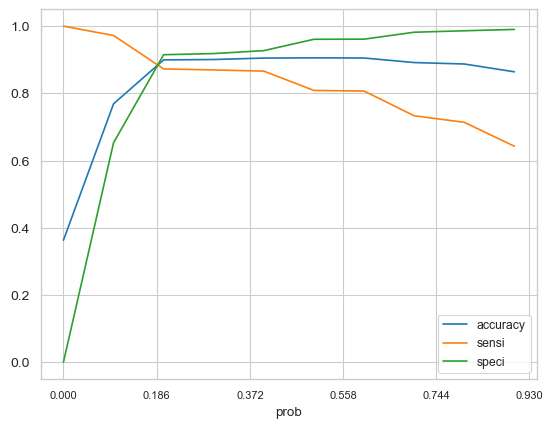

In [148]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df.plot.line(x = 'prob', y = ['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step = 0.186),size = 8)
plt.yticks(size = 10)
plt.show()

### 6.12 From the curve above, 0.186 is the optimum point to take it as a cutoff probability

In [149]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.186 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
0,1,0.860992,1979,1,1,1,1,1,1,1,1,1,1,0,1,86
1,0,0.439926,6249,0,1,1,1,1,1,0,0,0,0,0,1,44
2,0,0.041679,5557,0,1,0,0,0,0,0,0,0,0,0,0,4
3,0,0.006040,7865,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,0.006040,8491,0,1,0,0,0,0,0,0,0,0,0,0,1


In [150]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.860992,1979,1,86
1,0,0.439926,6249,1,44
2,0,0.041679,5557,0,4
3,0,0.006040,7865,0,1
4,0,0.006040,8491,0,1


### 6.13 Checking the overall accuracy

In [151]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7783993115318416

In [152]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[1985,  976],
       [  54, 1633]], dtype=int64)

In [153]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### 6.14 Checking the sensitivity of our logistic regression model

In [154]:
TP / float(TP+FN)

0.967990515708358

### 6.15 Checking the specificity

In [155]:
TN / float(TN+FP)

0.6703816278284364

### Observation

we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:

- Accuracy : 77.83%

- Sensitivity : 96.79%

- Specificity : 67.03%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

### 6.16 Checking False Postive Rate - predicting conversion when customer does not have convert

In [156]:
print(FP/ float(TN+FP))

0.32961837217156364


### 6.17 Positive Predictive value 

In [157]:
print (TP / float(TP+FP))

0.6259103104637792


### 6.18 Negative Predictive value

In [158]:
print (TN / float(TN+ FN))

0.973516429622364


### 6.19 Looking at the confusion matrix again

In [159]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[1985,  976],
       [  54, 1633]], dtype=int64)

### 6.20 Checking Precision

In [160]:
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6259103104637792

### 6.21 Checking Recall

In [161]:
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.967990515708358

In [162]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6259103104637792

In [163]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.967990515708358

In [164]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

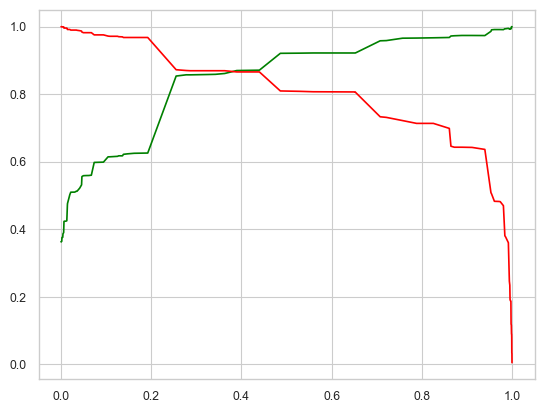

In [165]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# 7. Test Set - Getting the Predicted values

### 7.1 Scaling test set

In [166]:
num_cols = X_test.select_dtypes(include = ['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
8970,-1.144209,-0.560701,-1.266390,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8280,-0.783851,-0.236439,-0.628396,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6941,-0.783851,-1.021301,-1.266390,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
7343,4.621518,0.028867,-0.545456,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3734,-0.063135,-0.582810,0.647593,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [167]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,What is your current occupation_Working Professional,Last Activity_Email Bounced,Last Notable Activity_SMS Sent,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
8970,-0.560701,False,False,False,True,False,False,False,False
8280,-0.236439,False,False,False,False,False,False,False,False
6941,-1.021301,False,False,False,True,False,False,False,False
7343,0.028867,False,False,False,False,False,False,False,True
3734,-0.582810,False,False,False,False,False,False,False,False


In [168]:
X_test_7 = sm.add_constant(X_test)

### 7.2 Prediction on Test Set

In [169]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)
X_test_sm = X_test_sm.astype(int)
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1992 entries, 8970 to 1048
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   const                                                 1992 non-null   int32
 1   Total Time Spent on Website                           1992 non-null   int32
 2   What is your current occupation_Working Professional  1992 non-null   int32
 3   Last Activity_Email Bounced                           1992 non-null   int32
 4   Last Notable Activity_SMS Sent                        1992 non-null   int32
 5   Tags_Interested in other courses                      1992 non-null   int32
 6   Tags_Lost to EINS                                     1992 non-null   int32
 7   Tags_Other_Tags                                       1992 non-null   int32
 8   Tags_Ringing                                          1992 non-null   int32
 9  

In [170]:
y_test_pred = Result_7.predict(X_test_sm)
y_test_pred[:10]

8970    0.014578
8280    0.192432
6941    0.004468
7343    0.939786
3734    0.192432
7889    0.652654
837     0.004468
8227    0.045723
7245    0.999253
8622    0.954648
dtype: float64

### 7.3 Converting y_pred to a dataframe which is an array

In [171]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
8970,0.014578
8280,0.192432
6941,0.004468
7343,0.939786
3734,0.192432


### 7.4 Converting y_test to dataframe

In [172]:
y_test_df = pd.DataFrame(y_test)

### 7.5 Putting CustID to index

In [173]:
y_test_df['Prospect ID'] = y_test_df.index

### 7.6 Removing index for both dataframes to append them side by side 

In [174]:
y_pred_1.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

### 7.7 Appending y_test_df and y_pred_1

In [175]:
y_test_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [176]:
y_test_pred_final.head()

,Converted,Prospect ID,0
0,0,8970,0.014578
1,0,8280,0.192432
2,0,6941,0.004468
3,0,7343,0.939786
4,0,3734,0.192432


### 7.8 Renaming the column

In [177]:
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_test_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,8970,0.014578
1,0,8280,0.192432
2,0,6941,0.004468
3,0,7343,0.939786
4,0,3734,0.192432


### 7.9 Rearranging the columns

In [178]:
y_tes_pred_final = y_test_pred_final[['Prospect ID','Converted','Converted_prob']]
y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_prob.map( lambda x: round(x*100))
y_test_pred_final.head()

,Converted,Prospect ID,Converted_prob,Lead_Score
0,0,8970,0.014578,1
1,0,8280,0.192432,19
2,0,6941,0.004468,0
3,0,7343,0.939786,94
4,0,3734,0.192432,19


In [179]:
y_test_pred_final['final_Predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > 0.185 else 0)
y_test_pred_final.head()

,Converted,Prospect ID,Converted_prob,Lead_Score,final_Predicted
0,0,8970,0.014578,1,0
1,0,8280,0.192432,19,1
2,0,6941,0.004468,0,0
3,0,7343,0.939786,94,1
4,0,3734,0.192432,19,1


In [183]:
# Creating columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final[i]= y_test_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_test_pred_final.head()

,Converted,Prospect ID,Converted_prob,Lead_Score,final_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,8970,0.014578,1,0,1,0,0,0,0,0,0,0,0,0
1,0,8280,0.192432,19,1,1,1,0,0,0,0,0,0,0,0
2,0,6941,0.004468,0,0,1,0,0,0,0,0,0,0,0,0
3,0,7343,0.939786,94,1,1,1,1,1,1,1,1,1,1,1
4,0,3734,0.192432,19,1,1,1,0,0,0,0,0,0,0,0


In [184]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.


cutoff_df_test = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final[i] )
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df_test.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df_test)

     prob  accuracy     sensi     speci
0.0   0.0  0.368474  1.000000  0.000000
0.1   0.1  0.770080  0.972752  0.651828
0.2   0.2  0.904618  0.881471  0.918124
0.3   0.3  0.905622  0.880109  0.920509
0.4   0.4  0.907129  0.871935  0.927663
0.5   0.5  0.899598  0.810627  0.951510
0.6   0.6  0.899598  0.810627  0.951510
0.7   0.7  0.883534  0.728883  0.973768
0.8   0.8  0.877008  0.704360  0.977742
0.9   0.9  0.860944  0.651226  0.983307


<Figure size 1600x800 with 0 Axes>

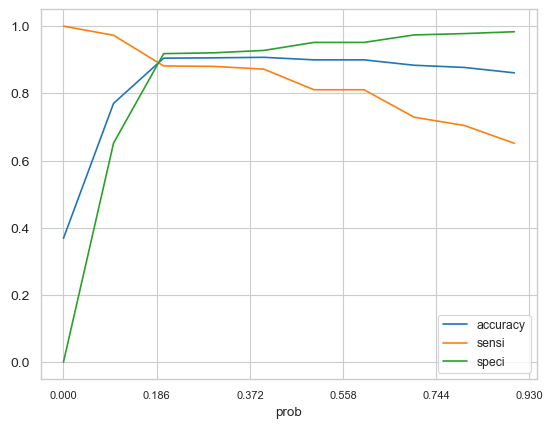

In [189]:
# Plotting accuracy sensitivity and specificity for various probabilities

plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df_test.plot.line(x = 'prob', y = ['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step = 0.186),size = 8)
plt.yticks(size = 10)
plt.show()

In [193]:
# From the curve above, 0.186 is the optimum point to take it as a cutoff probability

y_test_pred_final['final_Predicted'] = y_test_pred_final.Converted_prob.map( lambda x: 1 if x > 0.186 else 0)

y_test_pred_final.head()

y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_prob.map( lambda x: round(x*100))

y_test_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.014578,8970,0,1
1,0,0.192432,8280,1,19
2,0,0.004468,6941,0,0
3,0,0.939786,7343,1,94
4,0,0.192432,3734,1,19


### 7.10 Checking the overall accuracy

In [194]:
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_Predicted)

0.7796184738955824

In [195]:
confusion3 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_Predicted )
confusion3

array([[844, 414],
       [ 25, 709]], dtype=int64)

In [196]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

### 7.11 Checking the Sensitivity

In [197]:
TP / float(TP+FN)

0.9659400544959128

### 7.12 Checking the Specificity

In [198]:
TN / float(TN+FP)

0.670906200317965

### 7.13 Checking Precision

In [200]:
precision_score(y_test_pred_final.Converted , y_test_pred_final.final_Predicted)

0.6313446126447017

### 7.14 Checking Recall

In [201]:
recall_score(y_test_pred_final.Converted, y_test_pred_final.final_Predicted)

0.9659400544959128

In [202]:
y_test_pred_final.Converted, y_test_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Converted_prob)

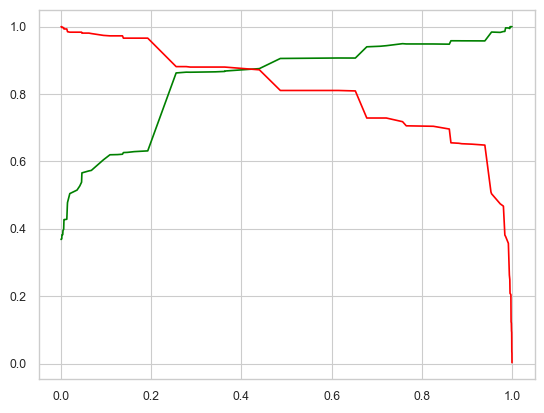

In [203]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Observation:

After running the model on the Test Data these are the figures we obtain:

- Accuracy : 77.96%

- Sensitivity : 96.59%

- Specificity : 67.09%

# 8. **Final Observation**

Let us compare the values obtained for Train & Test:

Train Data:

- Accuracy : 77.83%

- Sensitivity : 96.79%

- Specificity : 67.03%

Test Data:

- Accuracy : 77.96%

- Sensitivity : 96.59%

- Specificity : 67.09%

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model